In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['AmesHousing.csv']))
print(df.shape)

Saving AmesHousing.csv to AmesHousing.csv
(2930, 82)


In [ ]:
df = pd.read_csv("AmesHousing.csv")

In [ ]:

print("Columns:", df.columns.tolist())
dupes = df.columns[df.columns.duplicated()]
print("Duplicated columns:", dupes.tolist())
def drop_duplicate_columns(df, col_name):
    cols = df.columns
    indices = [i for i, col in enumerate(cols) if col == col_name]
    if len(indices) > 1:
        df = df.drop(df.columns[indices[1:]], axis=1)
    return df
target = 'SalePrice'
df = drop_duplicate_columns(df, target)
print("After dropping duplicates, columns count:", df.shape[1])

Columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'W

In [ ]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after dropping duplicate rows:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in num_cols:
    num_cols.remove(target)
print("Numeric columns:", num_cols)


Numeric columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


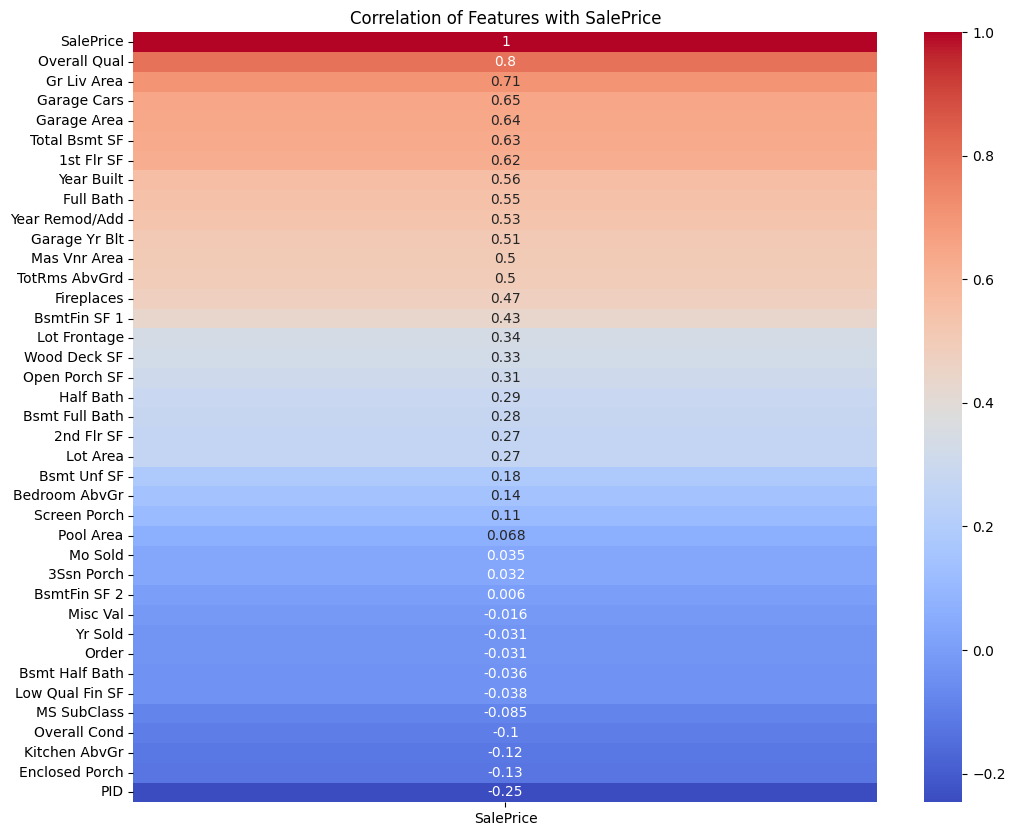

In [ ]:
plt.figure(figsize=(12, 10))
corr = df[num_cols + [target]].corr()
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title(f"Correlation of Features with {target}")
plt.show()


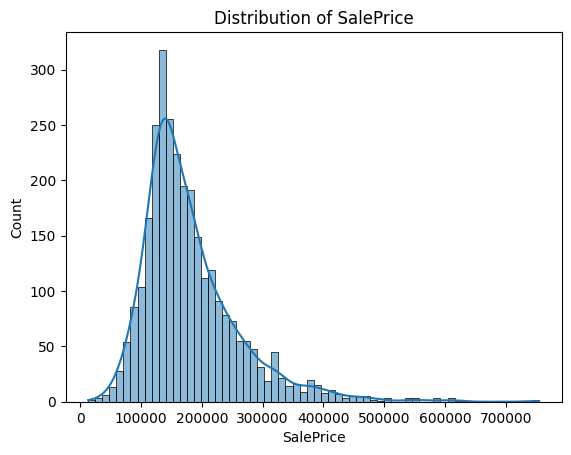

In [ ]:
sns.histplot(df[target], kde=True)
plt.title(f"Distribution of {target}")
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

Categorical columns: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [ ]:
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2051, 81), Test shape: (879, 81)


Linear Regression - Train R2: 0.8640 | Test R2: 0.8635 | MSE: 959604604.59


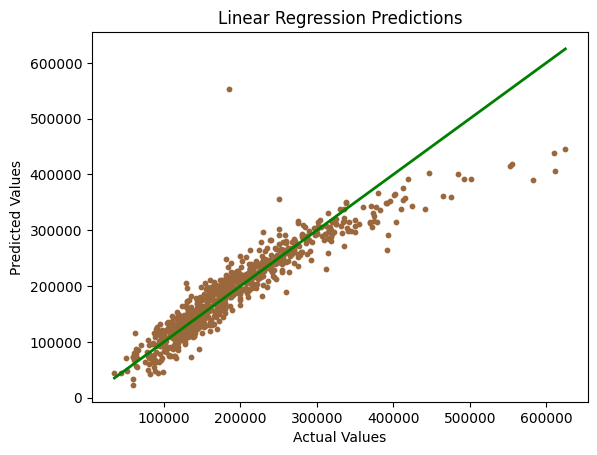

Random Forest - Train R2: 0.9838 | Test R2: 0.9117 | MSE: 620889666.50


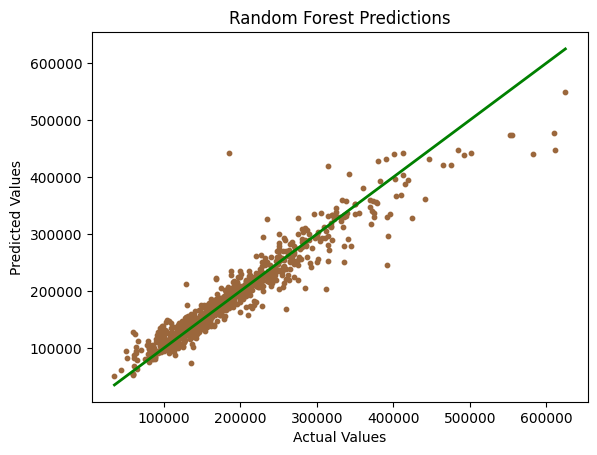

Gradient Boost - Train R2: 0.9618 | Test R2: 0.9161 | MSE: 589544575.30


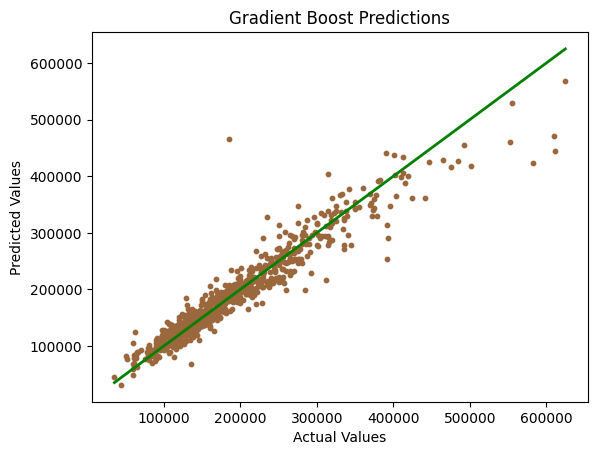

XGBoost - Train R2: 0.9992 | Test R2: 0.9155 | MSE: 594254016.00


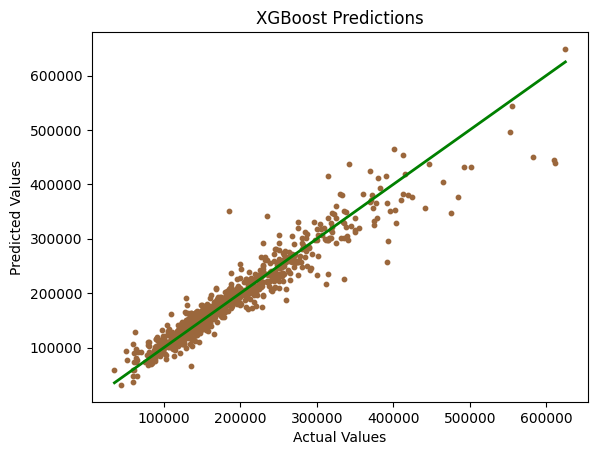

KNN - Train R2: 0.7922 | Test R2: 0.7599 | MSE: 1687848954.35


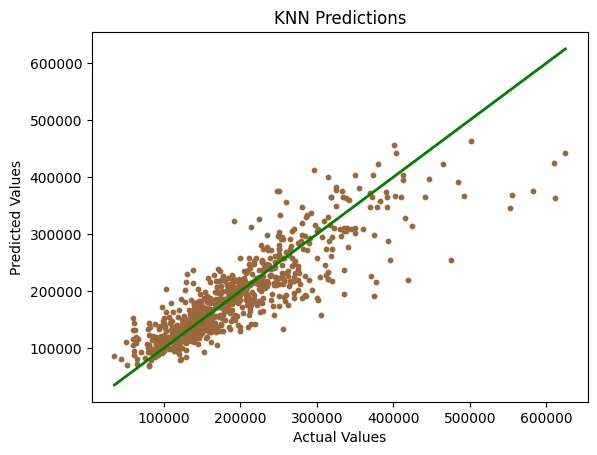

Decision Tree - Train R2: 1.0000 | Test R2: 0.8202 | MSE: 1264232389.40


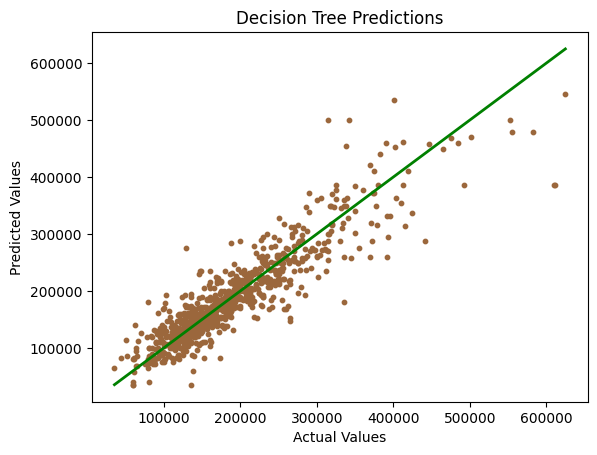

Bagging Regressor - Train R2: 0.9842 | Test R2: 0.9128 | MSE: 612977065.59


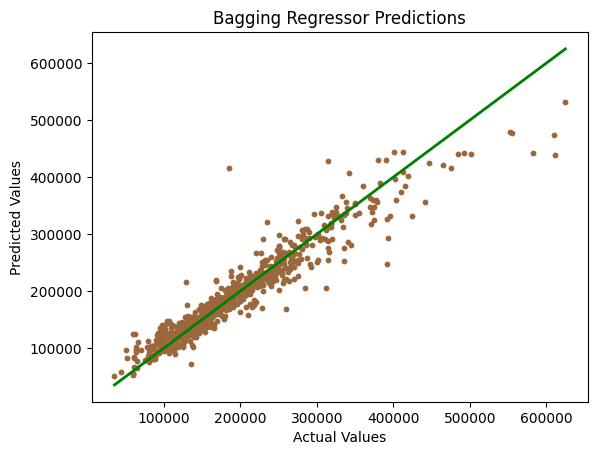

,Model,Test R2,MSE,R2 Score
0,Linear Regression,0.863488,959604604.589727,0.863488
1,Random Forest,0.911673,620889666.503086,0.911673
2,Gradient Boost,0.916132,589544575.302729,0.916132
3,XGBoost,0.915462,594254016.000000,0.915462
4,KNN,0.759888,1687848954.351081,0.759888
5,Decision Tree,0.820151,1264232389.402730,0.820151
6,Bagging Regressor,0.912798,612977065.592491,0.912798


In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42, eval_metric='rmse')),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, accuracy, mse, r2))

    print(f"{name} - Train R2: {model.score(X_train, y_train):.4f} | Test R2: {accuracy:.4f} | MSE: {mse:.2f}")

    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
    plt.show()
results_df = pd.DataFrame(results, columns=['Model', 'Test R2', 'MSE', 'R2 Score'])
results_df.style.highlight_max(subset=['Test R2','R2 Score'], color='lightgreen').highlight_min(subset=['MSE'], color='lightgreen')
